<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Author: Jing Rong GOH</b></p>
<p style="text-align: center;"><b>Assignment 2</b></p>
<p style="text-align: center;"><b>Note: This assignment has 7 questions (Q1-Q5 are 10 marks each, Q6-Q7 are 5 marks each)</b></p>
<p style="text-align: center;"><b>Note: Points may be deducted for overly verbose or inefficient code. Bonus credit will be awarded for concise and elegant solutions.</b></p>

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q1
Using the Breast Cancer dataset (`load_breast_cancer`) from `sklearn.datasets`, perform a logistic regression (without regularization) to predict whether a tumor is benign or malignant (`target`) based on the features: `mean radius`, `mean texture`, and `mean perimeter`. Where necessary, set seed values and/or random_state to `1`; set max_iter=`10000`.

##### (a) Use the model specification above to fit the entire Breast Cancer dataset. Using the fitted model, get the corresponding predicted `target` values and subsequently generate the confusion matrix. From the Confusion Matrix, report the True Positive, True Negative, False Positive and False Negative values.
##### (b) Use the values from the confusion matrix in `Q1a` to calculate the F1 score manually using the F1 Score formula. In addition, use an appropriate function from `sklearn` to compute the corresponding F1 score. Compare the two calculated F1 scores. Are they the same or different? Explain why.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit the logistic regression model (without regularization) using the training set. Calculate and report the F1-score on the validation set.
##### (d) Fit a Lasso Logistic Regression model (L1 regularization) with a penalty of `C = 0.6`. What is the F1 Score of the Lasso Logistic Regression model on the validation set?
##### (e) Based on the F1 Scores, which model (with or without regularization) performs better on the validation set?
##### (f) For the Lasso Logistic Regression model (L1 regularization), change the penalty to `C = 1e99`. What do you expect the resulting F1 Score to be on the validation set? Is the actual result aligned with your expectation? Explain your answer.

In [13]:
# Q1
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [14]:
# Q1a
breast_cancer = load_breast_cancer()
#convert into df to select target and features
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target


X1 = df[['mean radius', 'mean texture', 'mean perimeter']].values  # Features: mean radius, mean texture, mean perimeter
y1 = df['target'].values 

#creating logistic regression model
model1 = LogisticRegression(penalty = None, random_state = 1)
model1.fit(X1, y1)

# using model to predict outcomes
y_pred1 = model1.predict(X1)

#print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y1, y_pred1))
# Answer: True Positive: 339, True Negative: 184 , False Positive: 28, False Negative: 18

LogisticRegression(penalty=None, random_state=1)

Confusion Matrix:
 [[184  28]
 [ 18 339]]


In [48]:
# Q1b
# using formula f1_score = TP / TP + 0.5(FP+FN)
f1_manual = 339 / (339 + 0.5*(18+28))
print(f"F1 Score using manual formula: {f1_manual:.4f}")
print(f"F1 Score using function: {f1_score(y1, y_pred1):.4f}")
# Answer: They are the same as the underlying formulas are similar

F1 Score using manual formula: 0.9365
F1 Score using function: 0.9365


In [23]:
# Q1c
# split into 70-30 train-test split
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.3, random_state=1)
#initiate model
model2 = LogisticRegression(penalty = None, random_state = 1)
# fit model to training data
model2.fit(X_train1, y_train1)

# using model built from training data to predict outcomes
y_pred2 = model2.predict(X_val1)
print(f"F1 Score using function: {f1_score(y_val1, y_pred2):.4f}")

# Answer: 0.9041

LogisticRegression(penalty=None, random_state=1)

F1 Score using function: 0.9041


In [50]:
# Q1d
#initate lasso model with c = 0.6
model3 = LogisticRegression(penalty = 'l1', C = 0.6, random_state = 1, solver = 'liblinear', max_iter = 10000)

# fit model to training data
model3.fit(X_train1, y_train1)

# using model built from training data to predict outcomes
y_pred3 = model3.predict(X_val1)
print(f"F1 Score using function: {f1_score(y_val1, y_pred3):.4f}")

# Answer: 0.9140

LogisticRegression(C=0.6, max_iter=10000, penalty='l1', random_state=1,
                   solver='liblinear')

F1 Score using function: 0.9140


In [33]:
# Q1e

# Answer: Since the lasso model has a higher f1 score, the model with regularisation works better

In [21]:
# Q1f
model4 = LogisticRegression(penalty = 'l1', C = 1e99 , random_state = 1, solver = 'liblinear', max_iter = 10000)

# fit model to training data
model4.fit(X_train1, y_train1)

# using model built from training data to predict outcomes
y_pred4 = model4.predict(X_val1)
print(f"F1 Score using function: {f1_score(y_val1, y_pred4):.4f}")

# Answer: I expect the resulting f1-score to decrease to be the same as the logistic regression without any regularisation as a large c corresponds
# to a logistic regression with no regularisation. The actual results align with my expectations.

LogisticRegression(C=1e+99, max_iter=10000, penalty='l1', random_state=1,
                   solver='liblinear')

F1 Score using function: 0.9041


### Q2
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `1`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.
##### (a) Use the entire dataset to generate a simple decision tree with a maximum depth of 3. Visualize the tree structure and its decision boundaries.
##### (b) Using the decision tree from `Q2a`, state the average value of the median house price in the dataset.
##### (c) Using the decision tree from `Q2a`, calculate the Sum Squared Residuals (SSR) at the root node (i.e. top node). Calculate the Sum Squared Residuals (SSR) at the leaf nodes (i.e. terminal nodes). Calculate the corresponding percentage reduction in SSR between the root and leaf nodes.
##### (d) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the decision tree from `Q2a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (e) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit a full decision tree (i.e. no need to set `max_depth`) on the training data. Calculate and report the MSE on the validation set.
##### (f) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Bagging (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (g) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Random Forest (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (h) Which model above is the best? Why? What is the most important feature in this best model?.

In [24]:
# Q2 Load Libraries Here
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

DecisionTreeRegressor(max_depth=3, random_state=1)

<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'MedInc <= 5.035\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.25, 0.625, 'MedInc <= 3.074\nsquared_error = 0.837\nsamples = 16255\nvalue = 1.735'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'AveRooms <= 4.314\nsquared_error = 0.561\nsamples = 7860\nvalue = 1.357'),
 Text(0.0625, 0.125, 'squared_error = 0.67\nsamples = 3317\nvalue = 1.62'),
 Text(0.1875, 0.125, 'squared_error = 0.394\nsamples = 4543\nvalue = 1.165'),
 Text(0.375, 0.375, 'AveOccup <= 2.373\nsquared_error = 0.837\nsamples = 8395\nvalue = 2.089'),
 Text(0.3125, 0.125, 'squared_error = 1.291\nsamples = 1954\nvalue = 2.79'),
 Text(0.4375, 0.125, 'squared_error = 0.505\nsamples = 6441\nvalue = 1.876'),
 Text(0.75, 0.625, 'MedInc <= 6.82\nsquared_error = 1.221\nsamples = 4385\nvalue = 3.306'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'AveOccup <= 2.743\nsquared_error = 0.891\nsamples = 3047\nvalue = 2.906'),
 Text(0.5625, 0.125, 'squared_error = 1.006\nsamples = 1260\nva

Text(0.5, 1.0, 'Decision Tree for California Housing Dataset (max_depth=3)')

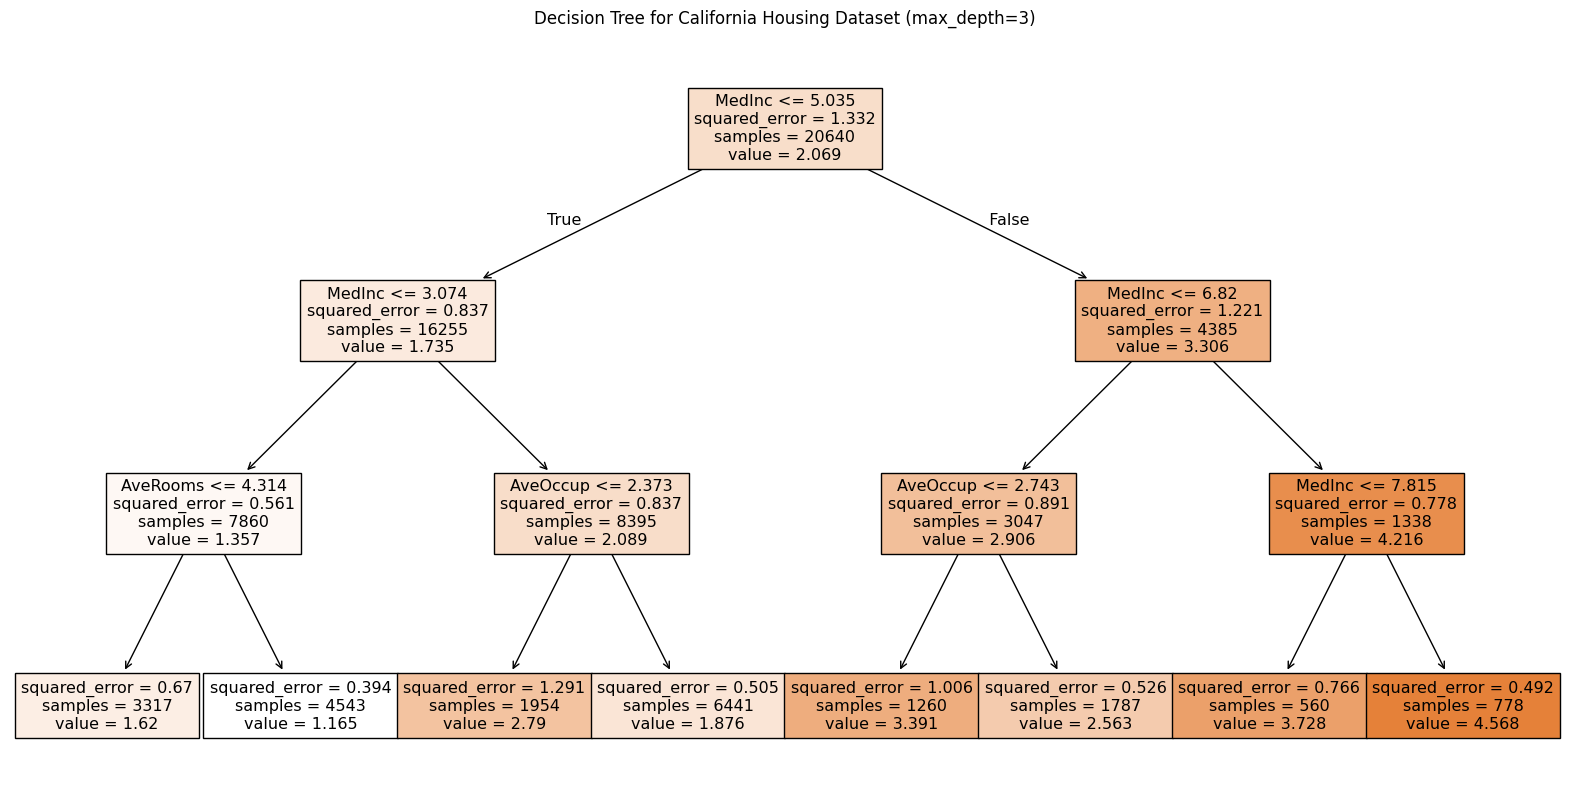

In [25]:
# Q2a
# Load the California housing dataset
data = fetch_california_housing()
X2 = data.data
y2 = data.target

# build a tree with depth = 3
tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)
tree_model.fit(X2, y2)

# plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True)
plt.title("Decision Tree for California Housing Dataset (max_depth=3)")
plt.show()

In [ ]:
# Q2b

# Answer: From the decision tree at the root node, the average value of the median house price in the dataset is 2.069

In [77]:
# Q2c
# calculate SSR at root node
ssr_root_node = 1.332 * 20640
#calculate SSR at leaf nodes
ssr_leafnodes = (0.67*3317) + (0.394*4543) + (1.291*1954) + (0.505*6441) + (1.006*1260) + (0.526*1787) + (0.766*560) + (0.492*778)
# calculate % reduction
SSR_reduction = (ssr_root_node-ssr_leafnodes)/ssr_root_node * 100

print(f"SSR at root node: {ssr_root_node}")
print(f"SSR at leaf nodes: {ssr_leafnodes}")
print(f"Percentage reduction in SSR between root and leaf nodes: {SSR_reduction:.2f}%")

# Answer: SSR at root node: 27492.480000000003
# SSR at leaf nodes: 12806.908999999998
# Percentage reduction in SSR between root and leaf nodes: 53.42%

SSR at root node: 27492.480000000003
SSR at leaf nodes: 12806.908999999998
Percentage reduction in SSR between root and leaf nodes: 53.42%


In [28]:
# Q2d
# converting data into 2d array to allow for model to predict
dummy_obs = [[5.0, 25, 6.0, 1.1, 1500, 3.0, 34.05, -118.25]]

# making prediction using model in 2a
predicted_value = tree_model.predict(dummy_obs)

#calculating the MSE
mse1 = mean_squared_error([[2.0]], predicted_value)
print(f"Mean Squared Error with max_depth=3: {mse1:.4f}")

# Answer: 0.0154

Mean Squared Error with max_depth=3: 0.0154


In [31]:
# Q2e
#train test split 70-30
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X2, y2, test_size=0.3, random_state=1
)

# building full decision tree
full_decision_tree = DecisionTreeRegressor(random_state=1)
full_decision_tree.fit(X_train2, y_train2)

# Evaluate fitted model on validation set
y_pred5 = full_decision_tree.predict(X_val2)
print(f"MSE: {mean_squared_error(y_val2, y_pred5):.4f}")

# Answer: Mean-squared error: 0.4908

DecisionTreeRegressor(random_state=1)

MSE: 0.4908


In [32]:
# Q2f
# building bagged tree
bagging_regressor = RandomForestRegressor(n_estimators=200, random_state=1)
bagging_regressor.fit(X_train2, y_train2)

# Evaluate fitted model on validation set
y_pred6 = bagging_regressor.predict(X_val2)

print(f"MSE: {mean_squared_error(y_val2, y_pred6):.4f}")


# Answer: Mean-Squared error: 0.2587

RandomForestRegressor(n_estimators=200, random_state=1)

MSE: 0.2587


In [33]:
# Q2g
#building a random forest regressor
random_forest_regressor = RandomForestRegressor(n_estimators=200, random_state=1, max_features="sqrt")
random_forest_regressor.fit(X_train2, y_train2)

# Evaluate fitted model on validation set
y_pred7 = random_forest_regressor.predict(X_val2)
print(f"MSE: {mean_squared_error(y_val2, y_pred7):.4f}")

# Answer: Mean-Squared error:  0.2435

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)

MSE: 0.2435


<BarContainer object of 8 artists>

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'Longitude'),
  Text(2, 0, 'Latitude'),
  Text(3, 0, 'AveOccup'),
  Text(4, 0, 'AveRooms'),
  Text(5, 0, 'HouseAge'),
  Text(6, 0, 'AveBedrms'),
  Text(7, 0, 'Population')])

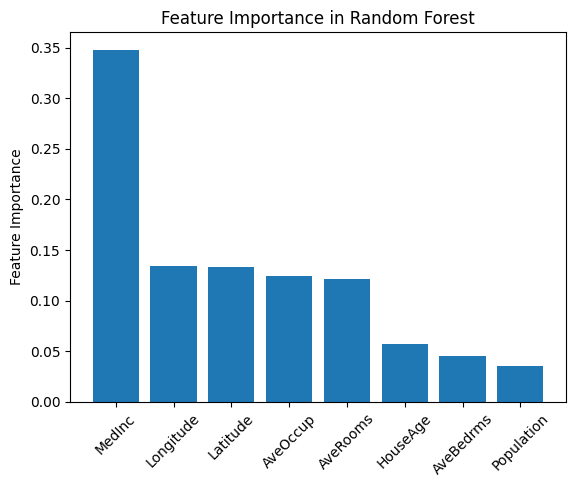

In [100]:
# Q2h
# getting feature importances of variables
feature_importances = random_forest_regressor.feature_importances_
feature_names = data.feature_names

#plotting the feature importances on a vertical bar graph
indices = np.argsort(feature_importances)[::-1]  
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.show()
# Answer: The best model is the Random Forest Regressor with 200 trees, with the lowest MSE.
# Based on the graph below, median income is the most important feature of the random forest model.

### Q3
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `8`. Where applicable, ensure the data is suitably standardized. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.

##### (a) Perform a K-Nearest Neighbors (KNN) regression on the entire dataset using `K=3` and report the corresponding MSE.
##### (b) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted KNN regression from `Q3a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform a KNN regression using `K=3` on the training data. Calculate and report the MSE on the validation set.
##### (d) Perform hyperparameter tuning to find the optimal value of K for KNN, using K values ranging from 1 to 20, with 5-folds cross validation strategy. Report the optimal K and the corresponding cross-validated MSE. Fit the optimal KNN model on the training data and report the MSE on the validation set.
##### (e) Refit the optimal KNN model using the entire dataset and report the corresponding MSE.
##### (f) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted optimal KNN regression from `Q3e` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.

In [34]:
# Q3 Load Libraries Here
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [38]:
# Q3a
data = fetch_california_housing()
X3 = data.data  # Features
y3 = data.target  # Target (house prices)

# Standardize the data 
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

k = 3  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k) # initialise KneighborsRegressor
knn_regressor.fit(X3, y3)
y_pred8 = knn_regressor.predict(X3)

print(f"Mean Squared Error (MSE) for KNN Regressor with k={k}: {mean_squared_error(y3, y_pred8):.4f}")

# Answer: Mean-Squared Error:  = 0.2158

KNeighborsRegressor(n_neighbors=3)

Mean Squared Error (MSE) for KNN Regressor with k=3: 0.2158


In [39]:
# Q3b
# converting data into 2d array to allow for model to predict
dummy_obs = [[5.0, 25, 6.0, 1.1, 1500, 3.0, 34.05, -118.25]]

# making prediction using model in 2a
predicted_value2 = knn_regressor.predict(dummy_obs)

#calculating the MSE
print(f"Mean Squared Error  for KNN Regressor with k={k}: {mean_squared_error([[2.0]], predicted_value2):.4f}")

# Answer: Mean-Squared Error: 0.4143

Mean Squared Error  for KNN Regressor with k=3: 0.4143


In [41]:
# Q3c
#train test split 70-30
X_train3, X_val3, y_train3, y_val3 = train_test_split(
    X3, y3, test_size=0.3, random_state=8
)

# Standardize the data 
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_val3 = scaler.transform(X_val3)

k = 3  # Number of neighbors
knn_regressor_training = KNeighborsRegressor(n_neighbors=k) # initialise KneighborsRegressor
knn_regressor_training.fit(X_train3, y_train3)

# predicting using trained model
y_pred9 = knn_regressor_training.predict(X_val3)

#calculating MSE
print(f"Mean Squared Error (MSE) for KNN Regressor with k={k}: { mean_squared_error(y_val3, y_pred9):.4f}")

# Answer: Mean-Squared Error: 0.4539

KNeighborsRegressor(n_neighbors=3)

Mean Squared Error (MSE) for KNN Regressor with k=3: 0.4539


In [43]:
# Q3d

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizes the data
    ('knn', KNeighborsRegressor())  # KNN Regressor without setting neighbors yet
])

param_grid1 = {
    'knn__n_neighbors': list(range(1, 21))  # Search for the best k in the range 1 to 20
}

# Define the 5-Fold cross-validation strategy with shuffling
kf1 = KFold(n_splits=5, shuffle=True, random_state=8)

# Initialize GridSearchCV
grid_search1 = GridSearchCV(pipeline, param_grid1, cv=kf1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to find the best k
grid_search1.fit(X_train3, y_train3)

best_k = grid_search1.best_params_['knn__n_neighbors']

# Retrieve best model
best_knn_regressor =  grid_search1.best_estimator_

# Use best model to predict on the validation set
y_pred10 = best_knn_regressor.predict(X_val3)

print(f"Optimal number of neighbors (k): {best_k}")
print(f"Best cross-validated MSE for k={best_k}: {-grid_search1.best_score_:.4f}\n")
print(f"Mean Squared Error (MSE) on validation set with k={best_k}: {mean_squared_error(y_val3, y_pred10):.4f}")

# Answer: Optimal k: 11
# Cross-validated Mean Squared Error:  0.4175
# Mean Squared Error with k = 11: 0.4191

GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='neg_mean_squared_error')

Optimal number of neighbors (k): 11
Best cross-validated MSE for k=11: 0.4175

Mean Squared Error (MSE) on validation set with k=11: 0.4191


In [45]:
# Q3e

knn_regressor_bestk = KNeighborsRegressor(n_neighbors=best_k) # initialise KneighborsRegressor
knn_regressor_bestk.fit(X3, y3)
y_pred11 = knn_regressor_bestk.predict(X3)

print(f"Mean Squared Error (MSE) for KNN Regressor with k={best_k}: {mean_squared_error(y3, y_pred11):.4f}")

# Answer: Mean-Squared Error:  = 0.3266

KNeighborsRegressor(n_neighbors=11)

Mean Squared Error (MSE) for KNN Regressor with k=11: 0.3266


In [47]:
# Q3f

# Q3b
# converting data into 2d array to allow for model to predict
dummy_obs = [[5.0, 25, 6.0, 1.1, 1500, 3.0, 34.05, -118.25]]

# making prediction using model in 2a
predicted_value3 = knn_regressor_bestk.predict(dummy_obs)

#calculating the MSE
print(f"Mean Squared Error  for KNN Regressor with k={best_k}: {mean_squared_error([[2.0]], predicted_value3):.4f}")

# Answer: Mean-Squared Error: 0.1393

Mean Squared Error  for KNN Regressor with k=11: 0.1393


### Q4.
Use the Wine dataset (`load_wine`) from `sklearn.datasets` for this question, where the objective is to perform Principal Component Analysis (PCA) on the dataset containing 13 features (i.e., chemical properties of different wines). Where applicable, ensure the data is suitably standardized.
##### (a) Perform PCA on the standardized wine dataset using all available features. How many Principal Components are generated? 
##### (b) What is the eigenvector for the Second Principal Component?
##### (c) State the loading scores for the Second Principal Component in simple English.
##### (d) Which feature is the most important in influencing the Second Principal Component? Explain your answer.
##### (e) Report the Principal Component scores for the first three observations projected onto the 2nd PC.
##### (f) What is the eigenvalue for the Second Principal Component?
##### (g) What is the proportion of total variation explained by the Second Principal Component?
##### (h) Generate a scree plot with appropriate titles and axis.

In [46]:
# Q4 Load Libraries Here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# Q4a.
# Loading data and scaling the features
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#conducting PCA on scaled variables and getting number of principal components
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_
print(f"Number Of Principal Components:{len(explained_variance)}")

# Answer: 13

Number Of Principal Components:13


In [26]:
# Q4b.
# getting all the eigenvectors
components = pca.components_
#printing Eigenvector for second PC
print(f"Eigenvector for the second PC: \n{components[1]}\n")
# Answer:
# [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
#  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
#   0.36490283]

Eigenvector for the second PC: 
[ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
 -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
  0.36490283]



In [33]:
# Q4c
# writing a loop to automatically print out loading score of each feature
components_pc2 = components[1]
wine_features = data.feature_names
for i in range(len(components_pc2)):
    print(f"{components_pc2[i]} is loading score on {wine_features[i]}")

# Answer:
    
# 0.4836515478172144 is loading score on alcohol
# 0.2249309346278448 is loading score on malic_acid
# 0.3160688140253154 is loading score on ash
# -0.010590502288190941 is loading score on alcalinity_of_ash
# 0.29963400323786227 is loading score on magnesium
# 0.0650395118192795 is loading score on total_phenols
# -0.0033598121003077784 is loading score on flavanoids
# 0.028779488112986782 is loading score on nonflavanoid_phenols
# 0.03930172228973277 is loading score on proanthocyanins
# 0.529995672070044 is loading score on color_intensity
# -0.2792351479242824 is loading score on hue
# -0.1644961928357849 is loading score on od280/od315_of_diluted_wines
# 0.36490283179808236 is loading score on proline

0.4836515478172144 is loading score on alcohol
0.2249309346278448 is loading score on malic_acid
0.3160688140253154 is loading score on ash
-0.010590502288190941 is loading score on alcalinity_of_ash
0.29963400323786227 is loading score on magnesium
0.0650395118192795 is loading score on total_phenols
-0.0033598121003077784 is loading score on flavanoids
0.028779488112986782 is loading score on nonflavanoid_phenols
0.03930172228973277 is loading score on proanthocyanins
0.529995672070044 is loading score on color_intensity
-0.2792351479242824 is loading score on hue
-0.1644961928357849 is loading score on od280/od315_of_diluted_wines
0.36490283179808236 is loading score on proline


In [18]:
# Q4d

# Answer: color_intensity since it has the highest absolute loading score.

In [38]:
# Q4e
#getting principal components
p_components = principal_components
# Getting principal Component Scores for the first three observations projected onto the 2nd PC
print(f"Principal Component Scores for the first three observations projected onto the 2nd PC: \n{p_components[1,:3]}\n")
# Answer: [ 2.20946492 -0.33339289 -2.02645737]

Principal Component Scores for the first three observations projected onto the 2nd PC: 
[ 2.20946492 -0.33339289 -2.02645737]



In [37]:
# Q4f
# Eigenvalue for each PC 
explained_variance = pca.explained_variance_
# Printing Eigenvalue for the second PC
print(f"Eigenvalues: {explained_variance[1]}")
# Answer: 2.5110809296451224

Eigenvalues: 2.5110809296451224


In [42]:
# Q4g
# Explained variance ratio for each PC
explained_variance_ratio = pca.explained_variance_ratio_
# Explained variance ratio for 2nd PC
print(f"Proportion of Total Variation explained by the Second Principal Component: {explained_variance_ratio[1]}")
# Answer: 0.1920749025700893

Proportion of Total Variation explained by the Second Principal Component: 0.1920749025700893


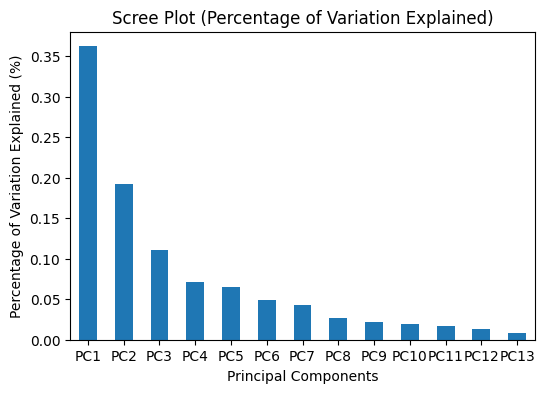

In [48]:
# Q4h
# Creating a DataFrame for Scree Plot
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the Scree Plot using Seaborn
explained_variance_df.plot(
    x='Principal Component',
    y='Explained Variance Ratio',
    kind='bar', 
    legend=False, 
    figsize=(6,4))
plt.title('Scree Plot (Percentage of Variation Explained)')
plt.ylabel('Percentage of Variation Explained (%)')
plt.xlabel('Principal Components')
plt.xticks(rotation=0)
plt.show()

### Q5. 
Use the Diabetes dataset (`load_diabetes`) from `sklearn.datasets` for this question, where the objective is to predict the progression of the disease (`target`) based on all available features. Set all seed values and random_state to `1` for reproducibility where necessary. Where applicable, use `adam` as the optimizer, with a batch size of `32`, and epochs is `1000`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated. Where applicable for neural networks, ensure the data is suitably standardized.

##### (a) Perform a multiple linear regression on the entire dataset. Report the Mean Squared Error (MSE).
##### (b) Perform a multiple linear regression using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (c) Use a neural network structure with 2 hidden layers, with each layer having 2 hidden nodes with the softplus activation function; having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (d) Using the same neural network architecture from `Q5c`, fit the model using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (e) Use a neural network structure with 64 nodes in the first hidden layer and 32 nodes in the second hidden layer (both using softplus); having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (f) Using the same neural network architecture from `Q5e` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (g) Using the same neural network architecture from `Q5e` but change the activation function to relu. Report the MSE.
##### (h) Using the same neural network architecture from `Q5g` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (i) Without further calculations, which model from `Q5a` to `Q5h` performs the best? Explain your answer.
##### (j) Without further calculations, using the best model from `Q5i` to fit the entire dataset, what will the MSE be? Explain your answer.
##### (k) Without further calculations, which model from `Q5a` to `Q5h` performs the worst? Explain your answer. Suggest the problem that is causing the poor performance and identify ways to improve performance of this model.

In [9]:
# Q5 Load Libraries Here
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
# Q5a
diabetes = load_diabetes()
X5 = diabetes.data  # Features
y5 = diabetes.target  # Target variable

#Initialise Multi linear regression model and train the model
multi_linear_model = LinearRegression()
multi_linear_model.fit(X5, y5)

# get y predicted values based on built model
y_pred_multi_linear = multi_linear_model.predict(X5)
#Get MSE
print(f"Mean Squared Error: {mean_squared_error(y5, y_pred_multi_linear):.4f}")

# Answer: Mean Squared Error: 2859.6963

Mean Squared Error: 2859.6963


In [20]:
# Q5b
#train-test split 70-30
X_train5, X_val5, y_train5, y_val5 = train_test_split(X5, y5, test_size=0.3, random_state=1)

# Initialise multi-linear regression and train the model
multi_linear_trained_model = LinearRegression()
multi_linear_trained_model.fit(X_train5, y_train5)

y_pred_multi_linear = multi_linear_trained_model.predict(X_val5)
print(f"Mean Squared Error: {mean_squared_error(y_val5, y_pred_multi_linear):.4f}")

# Answer: Mean Squared Error: 2827.0840

Mean Squared Error: 2827.0840


In [ ]:
# Q5c

# Answer:

In [ ]:
# Q5d

# Answer:

In [ ]:
# Q5e

# Answer:

In [ ]:
# Q5f

# Answer:

In [ ]:
# Q5g

# Answer:

In [ ]:
# Q5h

# Answer:

In [ ]:
# Q5i

# Answer:

In [ ]:
# Q5j

# Answer:

In [ ]:
# Q5k

# Answer:

### Q6.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 1 to 6` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 1 to 6`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

# Q6 Question here

#### a) Load the "Tips" dataset. Suppose that you want to create a new feature that classifies the size of the group as either "Small" (2 people or fewer) or "Large" (3 people or more). Additionally, replace any potential NaN values in the tip column with the median tip value and create a summary of the missing values in the dataset.

#### b) Perform a grouped analysis to investigate how tipping behavior differs based on the time of day and sex. Provide a summary of the average tip amount based on these categories.

#### c) Suppose you want to simulate a 10% increase in the total bill for all the customers who dined on a Sunday. Apply this transformation and analyze the impact on the average total bill and tip.

#### d) Using Seaborn or Matplotlib, create meaningful visualizations to uncover relationships in the data.

#### e) Use the y data profiling tool to conduct an exploratory data analysis on the cleaned dataset. Provide insights into key statistics, data types, missing values, and distribution of numerical and categorical features. Additionally, generate a list of potential correlations between numerical variables.

In [ ]:
# Q6 Answer here


### Q7.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 7 to 12` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 7 to 12`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

Question:

Use the Digits dataset (`load_digits`) from `sklearn.datasets` for this question, the objective is to predict the `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `30`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.

##### (a) Use the entire dataset to generate a simple decision tree with a maximum depth of 2. Calculate the MSE and explain why at times, max_depth is used and the potential problems.
##### (b) Visualize the tree structure and its decision boundaries. calculate the Sum Squared Residuals (SSR) at the leaf node (i.e. terminal node). 
##### (c) Use a validation approach where 80% of the data is used for training and 20% is used for validation. Use cost complexity pruning to obtain a sequence of ccp_alphas (i.e. the sequence of alphas that define each pruned subtree) and perform cost complexity pruning (using 5 fold cross validation) to identify the optimal alpha which minimizes the MSE. Using the optimal alpha, prune the decision tree and evaluate its performance on the validation set. Report the optimal alpha and the validation MSE. 
##### (d) Repeat part (c) here but utilising `GridSearchCV` from `sklearn.model_selection` and `Pipeline` `sklearn.pipeline`, instead of the for loop method taught in class. Check that the alpha value and MSE matches part c.
##### (e) Refit and visualize the final decision tree using the entire dataset with the optimal alpha. 
##### (f) Repeat part (c) but perform PCA on the features before getting the test metrics. Retain 95% of the variance in the data. How does the model performance compare before and after PCA? Does it perform better?

Mean Squared Error with max_depth=2: 6.0497799787188855


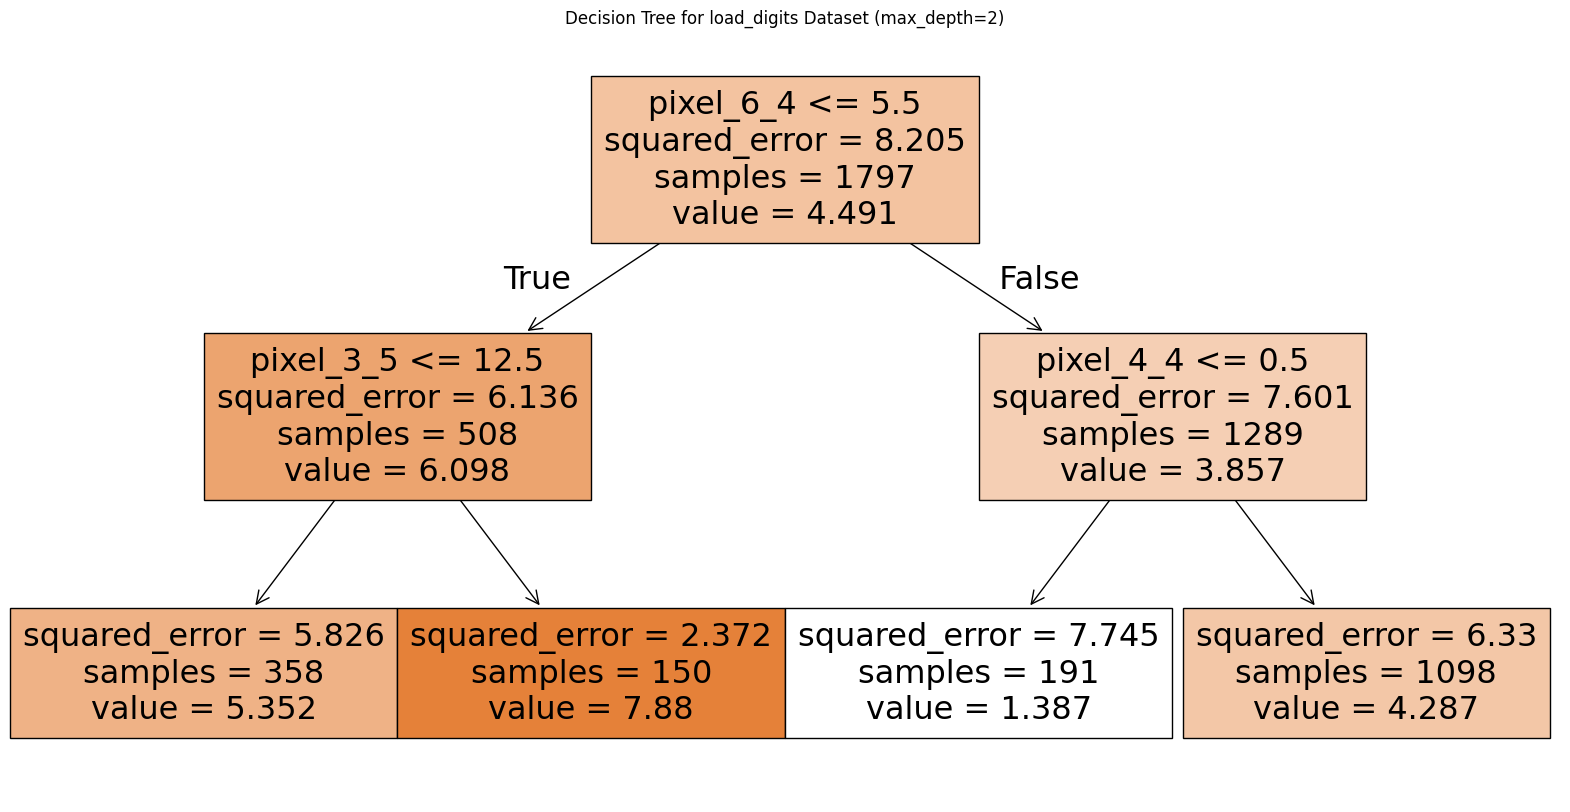

SSR of terminal node = 10871.143
Optimal alpha: 0.0248533651456408
MSE with pruning: 2.46
Optimal alpha: 0.0248533651456408
MSE with pruning: 2.46


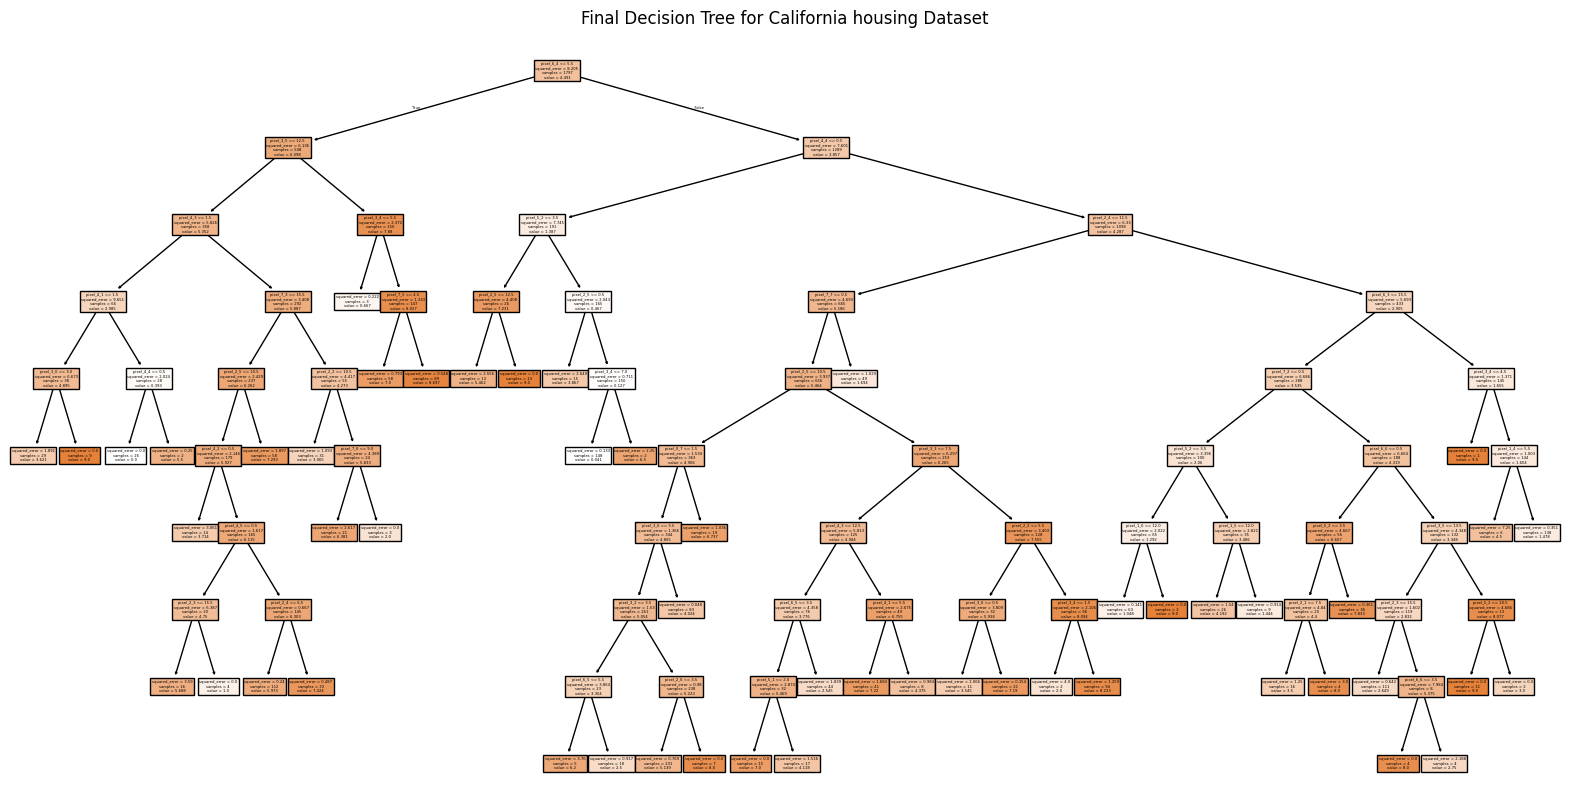

Cumulative Variation: 
[ 12.01023125  21.56462239  29.92104152  36.38591489  41.30585488
  45.53040467  49.63049757  52.98578189  55.98158174  58.86346302
  61.69614708  64.25718424  66.61589777  68.83942522  71.0050591
  72.91946175  74.69236491  76.35303645  77.95763211  79.50248472
  80.83657891  82.11616489  83.24634831  84.30535413  85.3048214
  86.23211929  87.08370067  87.91775219  88.69928638  89.45224077
  90.17623444  90.85604221  91.50748328  92.10990588  92.69164528
  93.23539757  93.75768494  94.23987902  94.68619364  95.12425691
  95.53584388  95.93360774  96.2873613   96.62190962  96.94636454
  97.25265123  97.54746129  97.82109586  98.07882359  98.30878421
  98.51918434  98.71566741  98.90297715  99.08597562  99.25030177
  99.40662867  99.5547163   99.68838951  99.81135937  99.9149177
 100.         100.         100.         100.        ]

Initial number of Principal Components: 
64
Final number of Principal Components: 
40
Optimal alpha: 0.0695905448178332
MSE with prun

In [13]:
# Q7 Answer here
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = load_digits()

X = data.data
y = data.target  

# Initialize and Fit the Decision Tree regressor with max_depth of 2
tree_model = DecisionTreeRegressor(max_depth=2, random_state=30)       
                                                                       
tree_model.fit(X, y)

# Make predictions using the trained model
y_pred = tree_model.predict(X)

# Part (a) Find MSE and explain the purpose of including a stopping mechanism such as max_depth.
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error with max_depth=2: {mse}")
# Answer: MSE is 6.0497799787188855. ; The purpose of including a max depth is to do pre-pruning

# Part (b) Visualize the decision tree and calculate the SSR of the terminal node
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True)    # filled = True adds color, where color intensity increases with the mean response value
plt.title("Decision Tree for load_digits Dataset (max_depth=2)")
plt.show()

SSR = (5.826*358)+(2.372*150)+(7.745*191)+(6.33*1098)
print(f"SSR of terminal node = {SSR}")
# Answer: SSR of terminal node = 10871.143

# Part (c) Do a Random Forest Model pruned and find the most important variable using np.argmax
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text

# Step 1: Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=30
)

# Step 2 & 3: Get a sequence of subtrees
# Define your Decision Tree
model_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30)

# Use cost complexity pruning and get sequence of alphas
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # effective alphas of each subtree    # Your set of alphas to test

# Define the Decision Tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=ccp_alpha)
    trees.append(clf)

# Step 4: Use K-fold cross-validation to choose the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=30)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average MSE for each alpha

# Step 5: Find the optimal alpha (the one that maximizes the cross-validated accuracy)
optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha}")

# Step 6: Prune the tree using the optimal alpha on the training set
pruned_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Step 7: Evaluate the pruned tree on the validation set
y_pred_pruned = pruned_tree.predict(X_val)
# Step 7: Evaluate the pruned tree on the validation set
print(f"MSE with pruning: {mean_squared_error(y_val, y_pred_pruned):.2f}")

# Part (d)
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import numpy as np

# Step 2: Setup the pipeline with a decision tree
pipeline = Pipeline([
    ('dt', DecisionTreeRegressor(criterion='squared_error', random_state=30))
])

# Step 3: Define the parameter grid, including a range of ccp_alpha values
model_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30)
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

param_grid = {
    'dt__ccp_alpha': ccp_alphas
}

# Step 4: Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=30), scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 5: Get the best alpha and its corresponding score
optimal_alpha = grid_search.best_params_['dt__ccp_alpha']
best_score = grid_search.best_score_

print(f"Optimal alpha: {optimal_alpha}")

pruned_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

y_pred_pruned = pruned_tree.predict(X_val)
# Step 7: Evaluate the pruned tree on the validation set
print(f"MSE with pruning: {mean_squared_error(y_val, y_pred_pruned):.2f}")


# Part (e)
final_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
final_tree.fit(X, y)


# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=data.feature_names, filled=True)
plt.title("Final Decision Tree for California housing Dataset")
plt.show()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = PCA()
principal_components = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) * 100
print(f"Cumulative Variation: \n{cumulative_variance}\n")
print(f"Initial number of Principal Components: \n{pca.n_components_}")
### retain 0.95 of variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f"Final number of Principal Components: \n{pca.n_components_}")
X_val_pca = pca.transform(X_val_scaled)

model_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30)

# Use cost complexity pruning and get the sequence of alphas
path = model_tree.cost_complexity_pruning_path(X_train_pca, y_train)
ccp_alphas = path.ccp_alphas  # effective alphas of each subtree

# Define the Decision Tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=ccp_alpha)
    trees.append(clf)

# Use K-fold cross-validation to choose the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=30)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average MSE for each alpha

# Find the optimal alpha (the one that maximizes the cross-validated accuracy)
optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha}")

# Prune the tree using the optimal alpha on the PCA-transformed training set
pruned_tree = DecisionTreeRegressor(criterion='squared_error', random_state=30, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train_pca, y_train)

# Evaluate the pruned tree on the PCA-transformed validation set
y_pred_pruned = pruned_tree.predict(X_val_pca)
print(f"MSE with pruning (PCA transformed): {mean_squared_error(y_val, y_pred_pruned):.2f}")

# (f) Answer: The MSE on the PCA-transformed dataset seems higher than the non-PCA-transformed dataset, with an MSE of 3.68 versus 2.46 on
# the non-PCA-transformed dataset. This may be because we only retained 95% of the variance and dropping 24 PCs resulted in a drop in
# model performance as  potentially, the information in the dropped PC was important for the DecisionTreeRegressor. Moreover, we have learned that
# decision trees are sensitive to the structure of the data. By transforming the features using PCA, we have changed the original feature relationships, 
# which may impact the model's ability to fit the data effectively.